## 🔶 Email-SpamEmail-TextData-Classifier-model

In [1]:
import string
import nltk
import pandas as pd

In [ ]:
# Download stopwords To Your System(only first and One time)
nltk.download('stopwords') #Then Remove From The Code

#import the stopwords which is downloaded in your system for any project
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv("Email-SpamEmail.csv", encoding='latin-1')[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['label', 'text']  # Rename columns
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

In [7]:
df['cleaned'] = df['text'].apply(clean_text)

In [8]:
df.head()

,label,text,cleaned
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['label'], test_size=0.2)

In [11]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)
predictions = model.predict(X_test_vec)

In [13]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9695067264573991


In [14]:
new_message = ["Congratulations! You've won a free iPhone. Click here!"]
new_message_vec = vectorizer.transform(new_message)
result = model.predict(new_message_vec)
print("Prediction (0 = Ham, 1 = Spam):", result[0])

Prediction (0 = Ham, 1 = Spam): 0


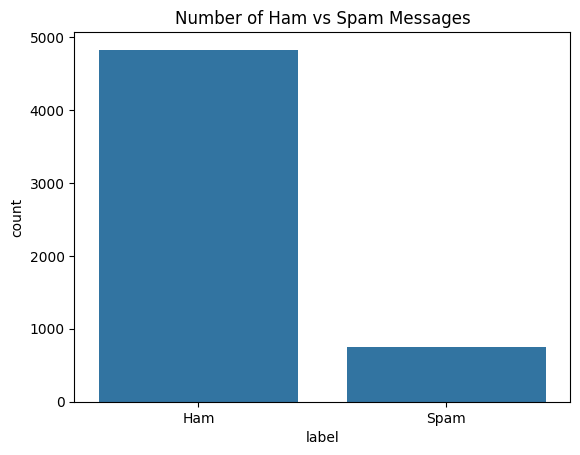

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of spam vs ham
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Number of Ham vs Spam Messages")
plt.show()

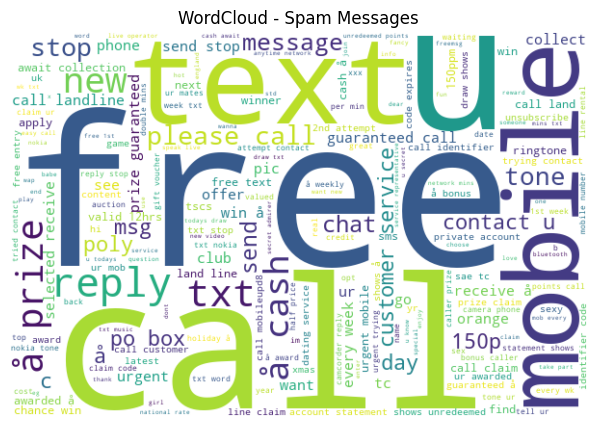

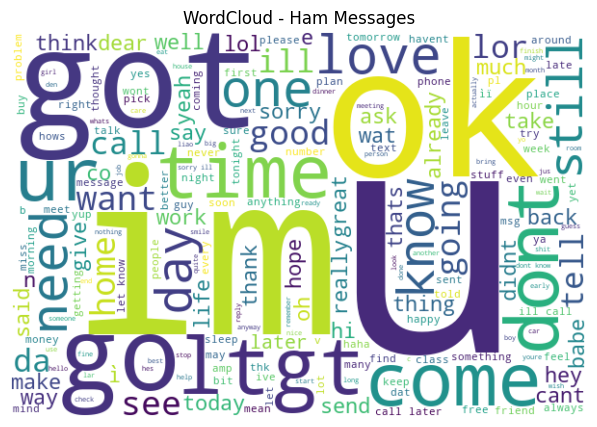

In [16]:
from wordcloud import WordCloud

# Separate messages
spam_words = ' '.join(df[df['label'] == 1]['cleaned'])
ham_words = ' '.join(df[df['label'] == 0]['cleaned'])

# WordCloud for Spam
plt.figure(figsize=(10, 5))
wc_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Spam Messages")
plt.show()

# WordCloud for Ham
plt.figure(figsize=(10, 5))
wc_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Ham Messages")
plt.show()

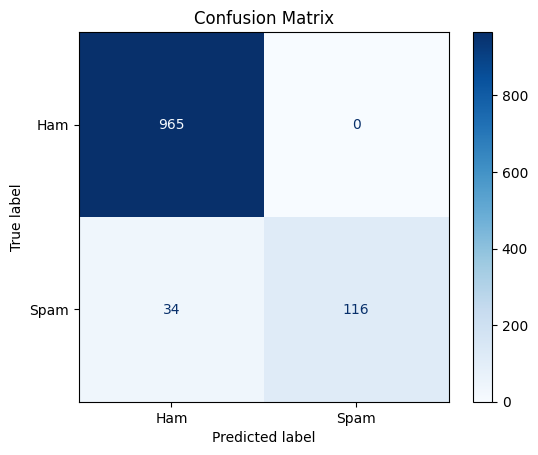

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

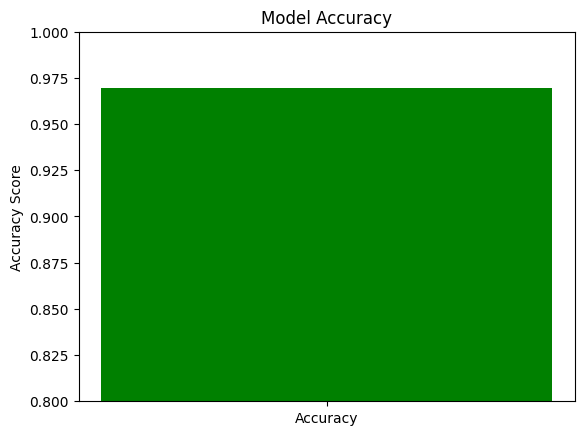

In [18]:
# Simple bar chart for accuracy
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()